#####  Name      : BHARATH BOMMEESHWAR K  
#####  Roll_no  : D22012
#####  Date       : 07-04-2023


# <div style="color:white;display:fill;border-radius:10px;background-color:#8ABEB9;overflow:hidden"><p style="padding:20px;color:WHITE;overflow:hidden;font-size:75%;margin:0;text-align:CENTER">JENFI HACKATHON</p></div>

### 1. IMPORTING LIBRARIES

In [2033]:
# pandas helps in analyzing,cleaning,exploring and manipulating tabular dataset
import pandas as pd

# numpy helps to make wide varieties of mathematical computations in arrays
import numpy as np

# importing matplot library to plot interactive visualization graph
import matplotlib.pyplot as plt

# to hide harmless warnings
import warnings
warnings.filterwarnings('ignore')

# time module helps to work with time computation related jobs
import time

# Resampling techiniques helps to adjust class imbalanceness in dataset 
from imblearn import under_sampling, over_sampling

# SMOTE - synthetic minorty oversampling technique helps to oversample the minority class
from imblearn.over_sampling import SMOTE

# Collection_counter helps to count the frequency of elements 
from collections import Counter

# Sklearn library contains various modules for machines learning and data preprocessing 
# StandardScaler helps to rescale the distribution
from sklearn.preprocessing import StandardScaler
# Minmax scaler helps to normalizes the values
from sklearn.preprocessing import MinMaxScaler

# importing Knn imputer to fill the missing data in the dataset
from sklearn.impute import KNNImputer

# importing Logistic regression algorithm
from sklearn.linear_model import LogisticRegression

# importing Knn Classifier algorithm
from sklearn.neighbors import KNeighborsClassifier

# importing decision tree Classifier algorithm
from sklearn.tree import DecisionTreeClassifier

# importing random forest Classifier algorithm
from sklearn.ensemble import RandomForestClassifier

# importing adaboost classifier algorithm
from sklearn.ensemble import AdaBoostClassifier

# importing gradient boosting Classifier algorithm
from sklearn.ensemble import GradientBoostingClassifier

# importing Linear discriminant analysis classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# import XGboost classifier
from xgboost import XGBClassifier

# import Bagging model
from sklearn.ensemble import BaggingClassifier

#Support vector machines
from sklearn.svm import SVC 

# importing Voting Classifier to ensemble multiple models
from sklearn.ensemble import VotingClassifier

# importing pipeline to assembly various steps together
from sklearn.pipeline import Pipeline

# importing Grid searchCV for identfying the model's best hyperparameters by different combinations of parameter search
from sklearn.model_selection import GridSearchCV

# importing Kfold cross validation to validate the model performance
from sklearn.model_selection import RepeatedStratifiedKFold

# to get the cross validation scores
from sklearn.model_selection import cross_val_score

# import Scoring metric like f1_score,auroc,recall,Classification Report
import sklearn.metrics as mat
from sklearn.metrics import f1_score,classification_report,roc_auc_score,accuracy_score,recall_score

### 2. PRELIMINARY ANALYSIS

In [2034]:
# setting to display number of rows and columns in notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2035]:
# importing training data
raw_data = pd.read_csv("Training_data_Jenfi_assessment_070423.csv")

In [2036]:
# making a copy of original dataset
df1 = raw_data.copy()
df1.head(5)

,Unnamed: 0,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19,M20,M21,M22,M23,M24,M25,M26,M27,M28,M29,M30,M31,M32,M33,M34,M35,M36,M37,M38,M39,M40,M41,M42,M43,M44,M45,M46,M47,M48,M49,M50,M51,M52,M53,M54,M55,M56,M57,M58,M59,M60,M61,M62,M63,M64,M65,M66,M67,M68,M69,M70,M71,M72,M73,M74,M75,M76,M77,M78,M79,M80,M81,M82,M83,M84,M85,M86,M87,M88,M89,M90,M91,M92,M93,M94,M95,M96,M97,M98,M99,M100,M101,M102,M103,M104,M105,M106,M107,M108,M109,M110,M111,M112,M113,M114,M115,M116,M117,M118,M119,M120,M121,M122,M123,M124,M125,M126,M127,M128,M129,M130,M131,M132,M133,M134,M135,M136,M137,M138,M139,M140,M141,M142,M143,M144,M145,M146,M147,M148,M149,M150,M151,target
0,320,2.240789e+08,0.0,0.0,8.142857,1.5,2.857143,2.387105,5.720456e+07,0.0,651246451.0,65792507.0,1.430925e+09,5.000000,15.0,0,0.571429,6.0,5.285714,6.285714,2.285474e+07,0.0,1.142857,2.910818e+07,0.0,47000000.0,1,1,2.358491,0.0,127860679.5,1000979.0,2.773771e+17,1.5,0.040450,0.0,7.760618,0.142857,1.0,4000000.0,4.709144e+08,NaN,18.0,11.0,6.0,9.594152e+07,1.934286e+08,1,119903530.0,345000000.0,1045041.0,1.646418e+08,3.0,7.500000,1.002027e+09,63.619048,829863679.0,5.169929e+07,0,2561926.0,2.714286,1.168908e+08,4.476974e+14,-78000000.0,0.000000e+00,19.0,-4.826130e+07,850824335.0,25859.0,1,2,29.0,96000000.0,0.0,0.666667,1.142857,2.428571,22269145.0,1.203129e+09,3.0,2.229919e+08,1.0,0.142857,250420668.0,0.000000,3.049770e+07,1.931810e+16,596624.0,34,2.857143,7560272.0,0.0,7.0,1.714286,1000979.0,5.078871e-02,NaN,3.901621e+06,12333435.0,2.970188e+08,0.428571,3.875934e+07,2.901706e+17,0.5,1.571429,2.000000,0.0,0.666667,0.5,1.0,1.144689e+08,1.504233e+07,2.532710e+08,13.0,1.714286,9.225540e+07,3.051623e+08,3.765203e+05,2.142857,6.938591e+07,1.842534e+08,2.107143,1.249568e+08,7383944.0,6.0,0.000000,2.824199e+08,2.767568,2,0.0,0.0,3.571429,265529069.0,0.571429,0.000000,1636035.0,4299092.0,61656900.5,2.285714,1.285714,2.000000,112896975.0,3.306454e+05,0.142857,1.428571,5.943793e+06,3.714286,8.0,1.137554,NaN,8.426000,0.914831,0
1,556,5.454261e+06,6138990.0,0.0,5.142857,NaN,0.285714,1.029878,1.694720e+08,0.0,402015474.0,0.0,0.000000e+00,7.142857,22.0,4,0.714286,9.0,2.142857,3.000000,2.112340e+08,1.0,0.571429,8.080173e+06,0.0,NaN,4,0,3.391304,0.0,NaN,1000000.0,1.079069e+12,NaN,1.803985,0.0,1.000000,0.285714,0.0,NaN,1.221445e+06,24.0,34.0,9.0,8.0,4.887793e+06,NaN,0,76967931.0,48000000.0,1509417.0,1.303709e+08,0.0,inf,0.000000e+00,10.333333,3228097.0,1.482683e+07,1,1885318.0,0.285714,1.906536e+06,1.536911e+15,-56080986.0,NaN,25.0,5.317400e+04,0.0,60744214.0,2,0,3.0,NaN,0.0,0.833333,1.428571,0.571429,0.0,1.852903e+08,3.0,4.611567e+05,3.0,0.285714,5303368.0,0.285714,2.760024e+06,1.246726e+16,22000.0,80,1.428571,9523538.0,0.0,11.0,1.428571,1240690.0,5.242413e-01,1.0,5.950768e+06,0.0,1.341153e+07,0.285714,7.594195e+07,NaN,1.5,1.000000,1.142857,0.0,0.566667,1.0,0.0,1.026874e+07,1.073313e+07,5.213575e+07,10.0,0.857143,5.129105e+06,1.682865e+07,2.557691e+07,0.285714,2.879922e+06,1.023804e+07,1.783784,1.077655e+07,22135868.0,1.0,0.428571,2.322849e+07,3.300000,0,1.0,0.0,0.428571,58451772.0,1.462500,1.428571,58451772.0,77572353.0,3115525.0,0.285714,0.000000,0.142857,0.0,2.694206e+06,0.285714,1.285714,4.264630e+06,2.600000,10.0,0.940661,2.000506,inf,1.016467,1
2,421,2.359738e+07,1272552.0,0.0,3.428571,NaN,4.000000,1.103578,1.852271e+07,16.0,124910611.0,44371332.0,5.518678e+08,12.142857,28.0,0,1.857143,28.0,1.571429,1.285714,1.918874e+07,3.0,1.142857,3.017980e+06,0.0,NaN,9,3,0.582734,1542674.0,NaN,83612.0,1.670457e+15,NaN,1.181445,0.0,NaN,4.285714,6.0,NaN,NaN,5.0,16.0,9.0,10.0,6.806219e+07,NaN,0,30856358.0,NaN,424182.0,4.291304e+06,0.0,0.066667,1.366557e+07,45.809524,166079328.0,3.245014e+07,0,1887248.0,4.285714,8.836247e+05,3.481712e+12,-18218386.0,NaN,36.0,-1.120641e+07,39115783.0,1892955.0,1,6,1.0,NaN,3.0,7.400000,5.857143,5.857143,21299777.0,9.205353e+07,4.0,5.160983e+07,38.0,3.000000,1204331.0,6.714286,3.877527e+07,1.635350e+15,3300.0,22,5.142857,38571267.0,10.0,10.0,3.714286,83612.0,9.469418e-01,6

In [2037]:
# size of the training dataset
df1.shape

(326, 153)

In [2038]:
# identying the datatypes
df1.dtypes

Unnamed: 0      int64
M1            float64
M2            float64
M3            float64
M4            float64
M5            float64
M6            float64
M7            float64
M8            float64
M9            float64
M10           float64
M11           float64
M12           float64
M13           float64
M14           float64
M15             int64
M16           float64
M17           float64
M18           float64
M19           float64
M20           float64
M21           float64
M22           float64
M23           float64
M24           float64
M25           float64
M26             int64
M27             int64
M28           float64
M29           float64
M30           float64
M31           float64
M32           float64
M33           float64
M34           float64
M35           float64
M36           float64
M37           float64
M38           float64
M39           float64
M40           float64
M41           float64
M42           float64
M43           float64
M44           float64
M45       

In [2039]:
# to check the class distribution in train data
df1["target"].value_counts()

1    245
0     81
Name: target, dtype: int64

In [2040]:
# to check the class distribution of test/validation data 
test_data = pd.read_csv("Test_data_Jenfi_assessment_070423.csv")
test_data["target"].value_counts()

1    63
0    25
Name: target, dtype: int64

In [2041]:
# identifying the null values in each variable
null = pd.DataFrame(df1.isna().sum())

In [2042]:
# Transposing the dataframe for easy viewing
null.T 

,Unnamed: 0,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19,M20,M21,M22,M23,M24,M25,M26,M27,M28,M29,M30,M31,M32,M33,M34,M35,M36,M37,M38,M39,M40,M41,M42,M43,M44,M45,M46,M47,M48,M49,M50,M51,M52,M53,M54,M55,M56,M57,M58,M59,M60,M61,M62,M63,M64,M65,M66,M67,M68,M69,M70,M71,M72,M73,M74,M75,M76,M77,M78,M79,M80,M81,M82,M83,M84,M85,M86,M87,M88,M89,M90,M91,M92,M93,M94,M95,M96,M97,M98,M99,M100,M101,M102,M103,M104,M105,M106,M107,M108,M109,M110,M111,M112,M113,M114,M115,M116,M117,M118,M119,M120,M121,M122,M123,M124,M125,M126,M127,M128,M129,M130,M131,M132,M133,M134,M135,M136,M137,M138,M139,M140,M141,M142,M143,M144,M145,M146,M147,M148,M149,M150,M151,target
0,0,0,12,127,0,242,0,173,20,12,19,0,45,0,17,0,12,2,0,0,12,12,12,0,0,171,0,0,0,12,190,13,30,171,89,20,239,12,12,178,186,72,27,12,12,0,206,0,4,229,18,12,135,47,0,19,11,0,0,0,0,0,29,62,206,2,0,12,0,0,0,127,255,12,27,0,0,0,17,15,12,49,12,13,12,0,52,12,0,0,28,12,12,0,17,74,60,57,0,0,12,12,92,49,0,14,12,43,36,30,0,12,18,37,0,0,12,12,0,0,0,0,0,0,12,12,13,0,0,12,12,0,13,24,12,63,0,62,0,0,0,0,12,12,0,0,15,12,0,73,106,15,0


In [2043]:
# Data missing percentage for each columns
null_perc = null.T/len(df1)*100
null_perc

,Unnamed: 0,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19,M20,M21,M22,M23,M24,M25,M26,M27,M28,M29,M30,M31,M32,M33,M34,M35,M36,M37,M38,M39,M40,M41,M42,M43,M44,M45,M46,M47,M48,M49,M50,M51,M52,M53,M54,M55,M56,M57,M58,M59,M60,M61,M62,M63,M64,M65,M66,M67,M68,M69,M70,M71,M72,M73,M74,M75,M76,M77,M78,M79,M80,M81,M82,M83,M84,M85,M86,M87,M88,M89,M90,M91,M92,M93,M94,M95,M96,M97,M98,M99,M100,M101,M102,M103,M104,M105,M106,M107,M108,M109,M110,M111,M112,M113,M114,M115,M116,M117,M118,M119,M120,M121,M122,M123,M124,M125,M126,M127,M128,M129,M130,M131,M132,M133,M134,M135,M136,M137,M138,M139,M140,M141,M142,M143,M144,M145,M146,M147,M148,M149,M150,M151,target
0,0.0,0.0,3.680982,38.957055,0.0,74.233129,0.0,53.067485,6.134969,3.680982,5.828221,0.0,13.803681,0.0,5.214724,0.0,3.680982,0.613497,0.0,0.0,3.680982,3.680982,3.680982,0.0,0.0,52.453988,0.0,0.0,0.0,3.680982,58.282209,3.98773,9.202454,52.453988,27.300613,6.134969,73.312883,3.680982,3.680982,54.601227,57.055215,22.08589,8.282209,3.680982,3.680982,0.0,63.190184,0.0,1.226994,70.245399,5.521472,3.680982,41.411043,14.417178,0.0,5.828221,3.374233,0.0,0.0,0.0,0.0,0.0,8.895706,19.018405,63.190184,0.613497,0.0,3.680982,0.0,0.0,0.0,38.957055,78.220859,3.680982,8.282209,0.0,0.0,0.0,5.214724,4.601227,3.680982,15.030675,3.680982,3.98773,3.680982,0.0,15.95092,3.680982,0.0,0.0,8.588957,3.680982,3.680982,0.0,5.214724,22.699387,18.404908,17.484663,0.0,0.0,3.680982,3.680982,28.220859,15.030675,0.0,4.294479,3.680982,13.190184,11.042945,9.202454,0.0,3.680982,5.521472,11.349693,0.0,0.0,3.680982,3.680982,0.0,0.0,0.0,0.0,0.0,0.0,3.680982,3.680982,3.98773,0.0,0.0,3.680982,3.680982,0.0,3.98773,7.361963,3.680982,19.325153,0.0,19.018405,0.0,0.0,0.0,0.0,3.680982,3.680982,0.0,0.0,4.601227,3.680982,0.0,22.392638,32.515337,4.601227,0.0


In [2044]:
# Drop the index column
df1.drop("Unnamed: 0",axis=1,inplace=True)

In [2045]:
# Drop variable whose missing values are >70%
for i in df1.columns:
     if df1[i].isna().sum()/len(df1)*100 > 70:
            df1.drop(i,axis=1,inplace=True)

In [2046]:
# Dropped columns based on missing values
dropped_columns = [i for i in raw_data.columns[1:] if i not in df1.columns]
dropped_columns

['M5', 'M36', 'M49', 'M72']

<b>Observations from the preliminary analysis:
* Target classes are highly imbalanced    
* The Target value doesnot contain any null values so we will not remove any rows completely
* Majority of the columns has missing values and we will try imputing using KNN imputation method 
* We dropped columns with missing values >70 % since the information contained in the column is very less and even if we   impute the effect of it over the target variable might be misleading.However we can try without dropping these variables compare the results or use a different thershold for dropping.
    

### 3. MISSING VALUE IMPUTATION

* We will use <b>"Minmax scaler"</b> transformation which will ensures features are all in same scale and have equal influence in distance calculation.

In [2047]:
# storing the column names in a variable
df1_col = df1.columns

In [2048]:
# shape of the dataframe after dropping 4variables and neglecting target
df1.iloc[:,:-1].shape 

(326, 147)

In [2049]:
#replace inf with nan in the dataset
df1.replace([np.inf, -np.inf], np.nan, inplace=True) 

In [2050]:
# Scaling the independent variables

# Initializing Minmax scaler object
mm_scaler = MinMaxScaler()

# fitting and transforming the independent variable
df1_scaled = mm_scaler.fit_transform(df1.iloc[:,:-1])

# converting to dataframe
df1_iv_scaled = pd.DataFrame(df1_scaled)
df1_target = pd.DataFrame(df1.iloc[:,-1])

In [2051]:
df1_scaled.shape

(326, 147)

In [2052]:
# concating to dataframe
df1_scaled = pd.concat([df1_iv_scaled,df1_target],axis=1)

In [2053]:
# renaming the columns of dataframe
df1_scaled.set_axis(df1_col, axis=1,inplace=True) 

In [2054]:
# separating X and Y for training the model
y = df1_scaled["target"]
X = df1_scaled.drop(["target"],axis=1)

In [2055]:
#Finding the best "k" neighbour for imputation

results = list()
neighbours = [1,3,5,7,9,15,18,21] 

for k in neighbours:
    
    #creating pipeline to assemble the model and kneighbours
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(k))), ('m', RandomForestClassifier())])
    
    #Kfold cross validation with different k values
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

    #scores of cross validation for different k's
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    #appending the results to a list
    results.append(np.mean(scores))
    
# converting to dataframe    
res = list(zip(neighbours, results))
df = pd.DataFrame(res, columns=['K neighbours', 'Val_score'])
df

,K neighbours,Val_score
0,1,0.764802
1,3,0.780155
2,5,0.775027
3,7,0.770971
4,9,0.778073
5,15,0.780155
6,18,0.768889
7,21,0.788267


* We dont see much difference in val_score with different k neighbours.We will choose "3" as our Neighbour search for missing value impuatation

In [2056]:
# Lets impute the missing values using 3 neighbours

# initializing the imputer object
imputer = KNNImputer(n_neighbors=3)

# fit the imputer object on the dataset
imputer.fit(X)

# transform the dataset
Xtrans = imputer.transform(X)

In [2057]:
# Normalized values and knn imputed converted to dataframe
df1_scaled_imputed = pd.DataFrame(Xtrans)  
df1_target = pd.DataFrame(df1.iloc[:,-1])
df1_imputed = pd.concat([df1_scaled_imputed,df1_target],axis=1)
df1_imputed.set_axis(df1_col, axis=1,inplace=True)
df1_imputed.to_csv("Null Variables dropped Normalized and Knn_imputed.csv",index=False)

In [2058]:
# Denormalizing the imputed values into original scale and converting to dataframe 
df1_train_descaled = pd.DataFrame(mm_scaler.inverse_transform(Xtrans))
df1_train_descaled = pd.concat([df1_train_descaled,df1_target],axis=1)
df1_train_descaled.set_axis(df1_col, axis=1,inplace=True)
df1_train_descaled.to_csv("Null Variables dropped denormalized and Knn_imputed.csv",index=False)

In [2059]:
# check the denormalized values to check if its matching with original values
df1_train_descaled.head()

,M1,M2,M3,M4,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19,M20,M21,M22,M23,M24,M25,M26,M27,M28,M29,M30,M31,M32,M33,M34,M35,M37,M38,M39,M40,M41,M42,M43,M44,M45,M46,M47,M48,M50,M51,M52,M53,M54,M55,M56,M57,M58,M59,M60,M61,M62,M63,M64,M65,M66,M67,M68,M69,M70,M71,M73,M74,M75,M76,M77,M78,M79,M80,M81,M82,M83,M84,M85,M86,M87,M88,M89,M90,M91,M92,M93,M94,M95,M96,M97,M98,M99,M100,M101,M102,M103,M104,M105,M106,M107,M108,M109,M110,M111,M112,M113,M114,M115,M116,M117,M118,M119,M120,M121,M122,M123,M124,M125,M126,M127,M128,M129,M130,M131,M132,M133,M134,M135,M136,M137,M138,M139,M140,M141,M142,M143,M144,M145,M146,M147,M148,M149,M150,M151,target
0,2.240789e+08,0.0,0.0,8.142857,2.857143,2.387105,5.720456e+07,0.0,651246451.0,65792507.0,1.430925e+09,5.000000,15.0,0.0,0.571429,6.0,5.285714,6.285714,2.285474e+07,0.0,1.142857,2.910818e+07,0.0,4.700000e+07,1.0,1.0,2.358491,0.0,1.278607e+08,1000979.0,2.773771e+17,1.500000,0.040450,0.000000,0.142857,1.0,4.000000e+06,4.709144e+08,3.333333,18.000000,11.0,6.0,9.594152e+07,1.934286e+08,1.0,119903530.0,1045041.0,1.646418e+08,3.0,7.500000,1.002027e+09,63.619048,829863679.0,5.169929e+07,0.0,2561926.0,2.714286,1.168908e+08,4.476974e+14,-7.800000e+07,0.000000e+00,19.0,-4.826130e+07,850824335.0,25859.0,1.0,2.0,29.0,0.0,0.666667,1.142857,2.428571,22269145.0,1.203129e+09,3.0,2.229919e+08,1.000000,0.142857,250420668.0,0.000000,3.049770e+07,1.931810e+16,596624.0,34.0,2.857143,7.560272e+06,0.0,7.0,1.714286,1000979.0,5.078871e-02,0.788889,3.901621e+06,12333435.0,2.970188e+08,0.428571,3.875934e+07,2.901706e+17,0.500000,1.571429,2.000000,0.0,0.666667,0.500000,1.000000,1.144689e+08,1.504233e+07,2.532710e+08,13.000000,1.714286,9.225540e+07,3.051623e+08,3.765203e+05,2.142857,6.938591e+07,1.842534e+08,2.107143,1.249568e+08,7383944.0,6.0,0.000000,2.824199e+08,2.767568,2.0,0.0,0.0,3.571429,265529069.0,0.571429,0.000000,1.636035e+06,4299092.0,61656900.5,2.285714,1.285714,2.000000,112896975.0,3.306454e+05,0.142857,1.428571,5.943793e+06,3.714286,8.0,1.137554,0.673176,8.426000,0.914831,0
1,5.454261e+06,6138990.0,0.0,5.142857,0.285714,1.029878,1.694720e+08,0.0,402015474.0,0.0,0.000000e+00,7.142857,22.0,4.0,0.714286,9.0,2.142857,3.000000,2.112340e+08,1.0,0.571429,8.080173e+06,0.0,1.234333e+07,4.0,0.0,3.391304,0.0,2.199603e+07,1000000.0,1.079069e+12,0.833333,1.803985,0.000000,0.285714,0.0,2.332033e+08,1.221445e+06,24.000000,34.000000,9.0,8.0,4.887793e+06,0.000000e+00,0.0,76967931.0,1509417.0,1.303709e+08,0.0,1.666667,0.000000e+00,10.333333,3228097.0,1.482683e+07,1.0,1885318.0,0.285714,1.906536e+06,1.536911e+15,-5.608099e+07,4.761905e+05,25.0,5.317400e+04,0.0,60744214.0,2.0,0.0,3.0,0.0,0.833333,1.428571,0.571429,0.0,1.852903e+08,3.0,4.611567e+05,3.000000,0.285714,5303368.0,0.285714,2.760024e+06,1.246726e+16,22000.0,80.0,1.428571,9.523538e+06,0.0,11.0,1.428571,1240690.0,5.242413e-01,1.000000,5.950768e+06,0.0,1.341153e+07,0.285714,7.594195e+07,1.786641e+16,1.500000,1.000000,1.142857,0.0,0.566667,1.000000,0.000000,1.026874e+07,1.073313e+07,5.213575e+07,10.000000,0.857143,5.129105e+06,1.682865e+07,2.557691e+07,0.285714,2.879922e+06,1.023804e+07,1.783784,1.077655e+07,22135868.0,1.0,0.428571,2.322849e+07,3.300000,0.0,1.0,0.0,0.428571,58451772.0,1.462500,1.428571,5.845177e+07,77572353.0,3115525.0,0.285714,0.000000,0.142857,0.0,2.694206e+06,0.285714,1.285714,4.264630e+06,2.600000,10.0,0.940661,2.000506,0.656152,1.016467,1
2,2.359738e+07,1272552.0,0.0,3.428571,4.000000,1.103578,1.852271e+07,16.0,124910611.0,44371332.0,5.518678e+08,12.142857,28.0,0.0,1.857143,28.0,1.571429,1.285714,1.918874e+07,3.0,1.142857,3.017980e+06,0.0,3.616667e+06,9.0,3.0,0.582734,1542674.0,4.246794e+06,83612.0,1.670457e+15,2.666667,1.181445,0.000000,4.285714,6.0,-8.140667e+06,2.979856e+06,5.000000,16.000000,9.0,10.0,6.806219e+07,0.000000e+00,0.0,30856358.0,424182.0,4.291304e+06,0.0,0.066667,1.366557e+07,45.809524,166079328.0,3.245014e+07,0.0,1887248.0,4.285714,8.836247e+05,3.481712e+12,-1.821839e+07,0.000000e+00,36.0,-1.120641e+07,39115783.0,1892955.0,1.0,6.0,1.0,3.0

In [2060]:
# Importing the validation data file provided
df1_valid = pd.read_csv("Test_data_Jenfi_assessment_070423.csv")

# dropping variables which we dropped on train data
df1_valid.drop(['M5', 'M36', 'M49', 'M72',"Unnamed: 0"],axis=1,inplace=True)

In [2061]:
# storing target variable from validation data in a variable
df1_valid_target = df1_valid.iloc[:,-1]

In [2062]:
#replace inf with nan to overcome errors
df1_valid.replace([np.inf, -np.inf], np.nan, inplace=True)

In [2063]:
# normalize the dataset, only transforming because we will use the same fit of train data
df1_valid_norm = mm_scaler.transform(df1_valid.iloc[:,:-1])

# imputing the validation dataset
Xtrans_valid = imputer.transform(df1_valid_norm)

In [2064]:
df1_valid.iloc[:,:-1].shape

(88, 147)

In [2065]:
#storing column names of validation data in a variable
df1_valid_col = df1_valid.columns

In [2066]:
# denormalizing the validation data and saving it as dataframe
df1_valid_descaled = pd.DataFrame(mm_scaler.inverse_transform(Xtrans_valid))
df1_valid_descaled = pd.concat([df1_valid_descaled,df1_valid_target],axis=1)
df1_valid_descaled.set_axis(df1_valid_col, axis=1,inplace=True)
df1_valid_descaled.to_csv("validation Null Variables dropped denormalized and Knn_imputed.csv",index=False)

In [2067]:
# Check denormalized validation data if it matches with original validation file
df1_valid_descaled.head()

,M1,M2,M3,M4,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19,M20,M21,M22,M23,M24,M25,M26,M27,M28,M29,M30,M31,M32,M33,M34,M35,M37,M38,M39,M40,M41,M42,M43,M44,M45,M46,M47,M48,M50,M51,M52,M53,M54,M55,M56,M57,M58,M59,M60,M61,M62,M63,M64,M65,M66,M67,M68,M69,M70,M71,M73,M74,M75,M76,M77,M78,M79,M80,M81,M82,M83,M84,M85,M86,M87,M88,M89,M90,M91,M92,M93,M94,M95,M96,M97,M98,M99,M100,M101,M102,M103,M104,M105,M106,M107,M108,M109,M110,M111,M112,M113,M114,M115,M116,M117,M118,M119,M120,M121,M122,M123,M124,M125,M126,M127,M128,M129,M130,M131,M132,M133,M134,M135,M136,M137,M138,M139,M140,M141,M142,M143,M144,M145,M146,M147,M148,M149,M150,M151,target
0,3.728364e+06,0.0,1.399986e+06,2.857143,6.571429,0.333333,2.774900e+04,0.0,1.277520e+05,10853006.0,0.000000e+00,2.857143,2.0,0.0,0.000000,8.0,7.428571,3.857143,0.000000e+00,0.0,0.000000,2.378666e+07,0.0,4.200000e+06,3.0,4.0,1.560000,0.0,1.159180e+05,42017.0,5.853168e+13,4.000000,0.595393,6.0,0.285714,0.0,-2.953333e+08,1.516624e+06,6.000000,1.666667,1.0,0.0,5.018036e+07,4.714286e+06,3.0,4.614815e+07,27746.0,0.000000e+00,1.000000,3.000000,0.0,20.571429,6086005.0,2.128075e+07,1.0,1.206034e+07,7.000000,-6.443362e+06,2.177592e+13,-2.632097e+05,1.671429e+07,8.0,-9.567143e+04,0.0,59235606.0,0.0,0.0,40.000000,0.0,0.888889,4.857143,4.571429,788860.0,90840.0,2.0,0.000000e+00,1.333333,0.000000,0.0,0.000000,1.707757e+07,1.697259e+15,44000.0,32.0,4.571429,28775.0,0.0,1.0,3.571429,42017.0,0.662103,0.500000,1.961312e+06,9033544.0,8.408577e+05,0.000000,0.000000e+00,2.430042e+14,1.000000,3.285714,1.833333,0.0,0.194444,0.5,1.0,2.796102e+06,0.000000e+00,2.877500e+04,1.666667,1.142857,1.626117e+07,0.000000e+00,0.000000e+00,2.142857,1.619399e+07,3.215477e+06,4.442623,1.495751e+07,4747051.0,21.0,0.000000,1.856550e+06,1.665730,1.0,0.0,0.0,2.428571,190000.0,0.500000,0.142857,4665875.0,116433433.0,1.996006e+06,2.142857,1.714286,5.714286,0.0,0.000000e+00,0.142857,1.714286,5.551383e+06,2.571429,1.0,1.032424,0.732185,0.985438,0.048041,1
1,2.338423e+06,1526173.0,3.899477e+07,1.857143,3.428571,1.526503,1.636418e+06,0.0,2.368034e+07,0.0,6.300000e+07,0.428571,7.0,2.0,2.000000,3.0,1.285714,2.000000,8.764371e+06,2.0,2.000000,4.803452e+06,100000000.0,5.628869e+07,2.0,2.0,2.128205,0.0,8.120148e+07,1000000.0,5.139768e+14,1.333333,0.925216,0.0,0.714286,0.0,-2.966667e+05,2.562371e+08,6.000000,32.000000,9.0,8.0,2.507640e+07,2.857143e+05,1.0,2.749027e+06,1004341.0,5.966958e+06,1.666667,2.000000,0.0,11.066667,4601980.0,6.142857e+06,0.0,1.284518e+06,4.000000,-2.153286e+05,3.112605e+11,-1.393400e+06,1.429767e+07,5.0,-4.652200e+04,2436229.0,0.0,0.0,0.0,9.666667,1.0,1.375000,1.285714,1.428571,0.0,77998964.0,1.5,1.618339e+06,7.000000,1.142857,2081829.0,1.428571,1.435943e+06,4.479555e+13,-384.0,65.0,0.714286,5195570.5,2.0,8.0,1.142857,1000000.0,0.989342,0.750000,1.262449e+06,0.0,1.510695e+06,0.571429,3.667040e+06,1.389384e+11,1.200000,1.714286,0.666667,2.0,2.553571,1.5,1.0,1.750420e+06,1.599992e+06,1.024418e+07,26.000000,0.571429,2.819764e+06,5.955433e+06,6.962011e+06,0.571429,2.471720e+06,1.039070e+06,1.727273,1.732082e+06,1528938.0,0.0,1.000000,6.482270e+06,1.940000,0.0,1.0,2.0,1.428571,2476329.0,0.584980,1.000000,2476329.0,0.0,1.656758e+06,0.571429,1.285714,1.571429,0.0,1.553804e+07,0.714286,0.285714,2.197055e+06,1.500000,11.0,0.933704,0.996820,0.934458,1.034571,1
2,5.778643e+07,0.0,0.000000e+00,2.000000,1.714286,0.000000,1.731965e+07,0.0,5.180000e+05,0.0,0.000000e+00,3.428571,1.0,0.0,0.000000,6.0,5.428571,2.285714,7.857143e+03,2.0,0.000000,2.296667e+08,0.0,5.866667e+07,0.0,1.0,3.634146,0.0,1.483401e+06,1016224.0,5.155113e+15,1.000000,5.253068,0.0,0.000000,0.0,-2.280000e+07,4.543338e+06,2.666667,4.000000,0.0,4.0,7.084429e+06,0.000000e+00,1.0,1.674969e+09,299000.0,0.000000e+00,0.000000,1.666667,45029428.0,2.266667,178852812.0,8.644455e+06,1.0,1.737371e+09,1.714286,6.808786e+06,1.837372e+15,5.000000e+05,3.571429e+07,13.0,-5.614219e+07,0.0,15755000.0,1.0,0.0,2.000000,0.0,0.250000,3.428571,0.428571,81727523.0,1126224.0,0.0,1.240086e+06,13.000000,

### 4.CREATING USER-DEFINED FUNCTIONS

*  Creating useful functions for displaying results
    

In [2068]:
# creating function for classification report of different model

def multiple_model(model,x_train,y_train,x_valid,y_valid):           

    t_model = model.fit(x_train,y_train)
    pred = t_model.predict(x_valid)

    print("__"*50)
    print(model)
    print(classification_report(y_valid,pred))
    cm1= mat.confusion_matrix(y_valid,pred)
    TN = cm1[0][0]
    FN = cm1[1][0]
    TP = cm1[1][1]
    FP = cm1[0][1]
    cm1_frame = pd.DataFrame({"Predicted +ve [1]":[TP,FP],"Predicted -ve [0]":[FN,TN]},index=["Actual +ve [1]","Actual -ve [0]"])
    print(cm1_frame)

In [2069]:
# Creating function for Voting classifier - report

def voting_classifier(m1,m2,m3,x_train,y_train,x_valid,y_valid):

    model1 = m1 
    model2 = m2  
    model3 = m3

    # Define the voting classifier
    voting_clf = VotingClassifier(estimators=[('m1', model1), ('m2', model2), ('m3', model3)], voting='soft')

    # Train the voting classifier on the training data
    voting_clf.fit(x_train, y_train)

    # Evaluate the performance of the voting classifier on the test data
    pred = voting_clf.predict(x_valid)

    print("Voting Classifier")
    print(classification_report(y_valid,pred))
    cm2= mat.confusion_matrix(y_valid,pred)
    TN = cm2[0][0]
    FN = cm2[1][0]
    TP = cm2[1][1]
    FP = cm2[0][1]
    cm2_frame = pd.DataFrame({"Predicted +ve [1]":[TP,FP],"Predicted -ve [0]":[FN,TN]},index=["Actual +ve [1]","Actual -ve [0]"] )
    print(cm2_frame)

In [2070]:
# creating fuction for creating final results as dataframes

# Display for multiple frame in a row
from IPython.display import display_html
pd.set_option('display.colheader_justify', 'center')

def result_frame(models,x_train,y_train,x_valid,y_valid,m1=False,m2=False,m3=False):
    
    # creating list to save the f1,auroc,recall,accuracy scores
    acc_1,f_1,auroc_1,recall_1= [],[],[],[]
    
    acc_2,f_2,auroc_2,recall_2= [],[],[],[]
    
    # intializing count 
    count=0
    
    # iterate each model from the list
    for model in models:
        
        # increasing count for each model
        count+=1
        
        # setting condition to pass to else loop
        if count<len(L2):

            #training the models with train data and predicting the validation data and train data
            t_model = model.fit(x_train,y_train)
            
            #predicting validation data
            pred1 = t_model.predict(x_valid)
            
            #predicting train data
            pred_t = t_model.predict(x_train) 

            #calculate accuracy score of the model in prediction class 1 - validation data and train data
            acc = accuracy_score(y_valid,pred1)
            acc_1.append(acc)
            
            acc_t = accuracy_score(y_train,pred_t)
            acc_2.append(acc_t)
                
            #calculate f1 score of the model in predicting class 1 - validation data and train data
            f1 = f1_score(y_valid,pred1)
            f_1.append(f1)
            
            f1_t = f1_score(y_train,pred_t)
            f_2.append(f1_t)
                 
            #calculate auroc score the model in predicting class 1 - validation data and train data
            auroc = roc_auc_score(y_valid,pred1)
            auroc_1.append(auroc)
            
            auroc_t = roc_auc_score(y_train,pred_t)
            auroc_2.append(auroc_t)
            
            #calculate sensitivity score the model in predicting class 1 - validation data and train data
            recall_score1 = mat.recall_score(y_valid,pred1)
            recall_1.append(recall_score1)
            
            recall_score_t = mat.recall_score(y_train,pred_t)
            recall_2.append(recall_score_t)
             

        else:
            
            # defining models for voting class_ we have defined 3 models
            model1 = m1
            model2 = m2
            model3 = m3

            # defining the estimators in voting classifier object
            voting_clf = model(estimators=[('m1', model1), ('m2', model2), ('m3', model3)], voting='soft')
            
            # fitting the train data to the classifier object
            voting_clf.fit(x_train, y_train)
            
            # predicting the validation data
            pred2 = voting_clf.predict(x_valid)
            
            # predicting the train data
            pred_t1 = voting_clf.predict(x_train)        
             
            #calculate accuracy score of the model in prediction class 1
            acc = accuracy_score(y_valid,pred2)
            acc_1.append(acc)
            
            acc_t = accuracy_score(y_train,pred_t)
            acc_2.append(acc_t)
            
            #calculate f1 score of the model in predicting class 1
            f1 = f1_score(y_valid,pred2)
            f_1.append(f1)
            
            f1_t = f1_score(y_train,pred_t)
            f_2.append(f1_t)

            #calculate auroc score the model in predicting class 1
            auroc = roc_auc_score(y_valid,pred2)
            auroc_1.append(auroc)
            
            auroc_t = roc_auc_score(y_train,pred_t)
            auroc_2.append(auroc_t)

            #calculate sensitivity score the model in predicting class 1
            recall_score1 = mat.recall_score(y_valid,pred2)
            recall_1.append(recall_score1)

            recall_score_t = mat.recall_score(y_train,pred_t)
            recall_2.append(recall_score_t)
            
    
    # Indexes for the dataframes
    indexes=["LogisticRegression","LinearDiscriminantClassifier","AdaptiveBoosting",
            "Gradient_Boosting","RandomForest","Bagging classifier","Xg boost","VotingClassifier"]

     
    # creating dataframe with the results
    df1 = pd.DataFrame({"Accuracy":acc_2,"F1_score":f_2,"Auroc":auroc_2,"Recall":recall_2},index=indexes)
    df2 = pd.DataFrame({"Accuracy":acc_1,"F1_score":f_1,"Auroc":auroc_1,"Recall":recall_1},index=indexes)

    # creating heading for dataframe
    df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Model's Performance on Train data")
    df2_style = df2.style.set_table_attributes("style='display:inline'").set_caption("Model's Performance on Validation data ")

    #returning the final dataframes
    return(display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True))
        

### 5.MODEL TRAINING AND VALIDATION

### <font color= BLUE> Experiment 1:

* <b> Included all variables _ no feature reduction, no transformationS used

In [2071]:
# Import the file and Separarting X/Y -- train data

df1_train_descaled = pd.read_csv("Null Variables dropped denormalized and Knn_imputed.csv")
print(df1_train_descaled.shape)  # check the size of train data

y_train1 = df1_train_descaled["target"]
X_train1 = df1_train_descaled.drop(["target"],axis=1)

(326, 148)


In [2072]:
# Importing the file and separating X/Y -- validation data

df1_valid_descaled = pd.read_csv("validation Null Variables dropped denormalized and Knn_imputed.csv")
print(df1_valid_descaled.shape)  # check the size of validation data

y_valid1 = df1_valid_descaled["target"]
X_valid1 = df1_valid_descaled.drop(["target"],axis=1)

(88, 148)


In [2073]:
# Initializing various Machine Learning models with its DEFAULT PARAMETERS to train  (random _state is fixed to make fair comparison between models over the same data)

lr  = LogisticRegression(random_state=50)                   #logistic regression classifier
ldm = LinearDiscriminantAnalysis()                           #Linear discriminant classifier
ab  = AdaBoostClassifier(random_state=50)                   #support vector machines classifier
gb  = GradientBoostingClassifier(random_state=50)           #gradientboost classifier
rf  = RandomForestClassifier(random_state=50)               #random forest classifier
bc  = BaggingClassifier(random_state=50)                    #Bagging classifier
xgb = XGBClassifier(random_state=50)                        #bagging classifier

In [2074]:
# Keeping all instances of the models in a list
L1 = [lr,ldm,ab,gb,rf,bc,xgb] 

In [2075]:
# Classification report of multiple models
for i in L1:
    multiple_model(i,X_train1,y_train1,X_valid1,y_valid1)

____________________________________________________________________________________________________
LogisticRegression(random_state=50)
              precision    recall  f1-score   support

           0       0.28      1.00      0.44        25
           1       0.00      0.00      0.00        63

    accuracy                           0.28        88
   macro avg       0.14      0.50      0.22        88
weighted avg       0.08      0.28      0.13        88

                Predicted +ve [1]  Predicted -ve [0]
Actual +ve [1]          0                 63        
Actual -ve [0]          0                 25        
____________________________________________________________________________________________________
LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

           0       0.37      0.28      0.32        25
           1       0.74      0.81      0.77        63

    accuracy                           0.66        88
   macro avg       0.55      

In [2076]:
# Based on the individual performance we will choose the best classifiers as our voting classifiers

m1,m2,m3 = xgb,gb,ab # xgboost,gradient,adaboost

voting_classifier(m1,m2,m3,X_train1,y_train1,X_valid1,y_valid1)

Voting Classifier
              precision    recall  f1-score   support

           0       0.77      0.40      0.53        25
           1       0.80      0.95      0.87        63

    accuracy                           0.80        88
   macro avg       0.78      0.68      0.70        88
weighted avg       0.79      0.80      0.77        88

                Predicted +ve [1]  Predicted -ve [0]
Actual +ve [1]         60                  3        
Actual -ve [0]         15                 10        


In [2077]:
# Creating Dataframe of the results
L2 = [lr,ldm,ab,gb,rf,bc,xgb,VotingClassifier]

# Using the function to create dataframe
result_frame(L2,X_train1,y_train1,X_valid1,y_valid1,m1,m2,m3)

,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.248466,0.000000,0.500000,0.000000
LinearDiscriminantClassifier,0.923313,0.950690,0.862207,0.983673
AdaptiveBoosting,0.990798,0.993890,0.985614,0.995918
Gradient_Boosting,1.000000,1.000000,1.000000,1.000000
RandomForest,1.000000,1.000000,1.000000,1.000000
Bagging classifier,0.993865,0.995918,0.991786,0.995918
Xg boost,1.000000,1.000000,1.000000,1.000000
VotingClassifier,1.000000,1.000000,1.000000,1.000000
,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.284091,0.000000,0.500000,0.000000


<b> Remarks:

* From the above trial with all the variables we can see the f1 score of Logistic model is zero because the "true postive" predicted by the model is Nil. This might be because the model couldnt establish linear relationship with (log(odds)) of outcome whereas rest of the models are performing on average.
* Scaling the variable will help in the case of logistic regression.

* <b> <font color= Green> NOTE: In real case scenario, the percentage of events(class 1) is usually lower in proportion compared to non events(class 0).
But in our case the events(class 1) is higher in train data. So lets concentrate to improve the auroc which is robust when class labels are interchanged.

### <font color= BLUE>Experiment 2:

* <b> Standardizing the Independent variables

In [2079]:
# Import the file and Separarting X/Y -- train data

df1_train_descaled = pd.read_csv("Null Variables dropped denormalized and Knn_imputed.csv")
print(df1_train_descaled.shape)  # check the size of train data

y_train2 = df1_train_descaled["target"]
X_train2 = df1_train_descaled.drop(["target"],axis=1)

(326, 148)


In [2080]:
# Importing the file and separating X/Y -- validation data

df1_valid_descaled = pd.read_csv("validation Null Variables dropped denormalized and Knn_imputed.csv")
print(df1_valid_descaled.shape)  # check the size of validation data

y_valid2 = df1_valid_descaled["target"]
X_valid2 = df1_valid_descaled.drop(["target"],axis=1)

(88, 148)


In [2081]:
# Standardizing the train data

# initializing the scaler object
scaler = StandardScaler()

# fit and transform the train data
X_train2_scaled = scaler.fit_transform(X_train2)

In [2082]:
# Standardizing the validation data using the fit of train data(mean and standard deviation)
X_valid2_scaled = scaler.transform(X_valid2)

In [2083]:
# Classification report of multiple models over scaled data
for i in L1:
    multiple_model(i,X_train2_scaled,y_train2,X_valid2_scaled,y_valid2)

____________________________________________________________________________________________________
LogisticRegression(random_state=50)
              precision    recall  f1-score   support

           0       0.50      0.32      0.39        25
           1       0.76      0.87      0.81        63

    accuracy                           0.72        88
   macro avg       0.63      0.60      0.60        88
weighted avg       0.69      0.72      0.69        88

                Predicted +ve [1]  Predicted -ve [0]
Actual +ve [1]         55                  8        
Actual -ve [0]         17                  8        
____________________________________________________________________________________________________
LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

           0       0.37      0.28      0.32        25
           1       0.74      0.81      0.77        63

    accuracy                           0.66        88
   macro avg       0.55      

In [2084]:
# Based on the individual performance we will choose the best classifiers as our voting classifiers

m1,m2,m3 = xgb,gb,ab # xgboost,gradient,adaboost

voting_classifier(m1,m2,m3,X_train2_scaled,y_train2,X_valid2_scaled,y_valid2)


Voting Classifier
              precision    recall  f1-score   support

           0       0.79      0.44      0.56        25
           1       0.81      0.95      0.88        63

    accuracy                           0.81        88
   macro avg       0.80      0.70      0.72        88
weighted avg       0.80      0.81      0.79        88

                Predicted +ve [1]  Predicted -ve [0]
Actual +ve [1]         60                  3        
Actual -ve [0]         14                 11        


In [2085]:
# Using the function to create dataframe
result_frame(L2,X_train2_scaled,y_train2,X_valid2_scaled,y_valid2,m1,m2,m3)

,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.880368,0.925144,0.775787,0.983673
LinearDiscriminantClassifier,0.923313,0.950690,0.862207,0.983673
AdaptiveBoosting,0.963190,0.975806,0.938322,0.987755
Gradient_Boosting,1.000000,1.000000,1.000000,1.000000
RandomForest,1.000000,1.000000,1.000000,1.000000
Bagging classifier,0.990798,0.993890,0.985614,0.995918
Xg boost,1.000000,1.000000,1.000000,1.000000
VotingClassifier,1.000000,1.000000,1.000000,1.000000
,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.715909,0.814815,0.596508,0.873016


<b> Remarks:

* From the above experiment as we expected the perfromance of the logistic regression improved drasitically with standardized variables.
* Irrespective of the variable scaling the performance of the other models is closer to the previous case as most of these model are non parametric.
* The auroc score is still very low we can try doing feature transformation to improve the score of auroc.
* The training dataset is highly imbalanced so the model doesnot get to learn both the classes equally.
* Applying oversampling technique like SMOTE can be helpful.
* Lets try increasing the size of the minority class and see the performance in our next trial

### <font color= BLUE> Experiment 3:

* <b> Balancing the class imbalanceness

In [2086]:
# Balancing the standardized data

#Initialize smote object - Sythetic Minority Oversampling Technique
oversample = SMOTE(random_state=50)

#oversampling the classes (Note:using the same scaled data from previous trial)
X_train_smt, y_train_smt = oversample.fit_resample(X_train2_scaled, y_train2)

# Summarizing the distribution
counter = Counter(y_train_smt)
for k,v in counter.items():
    per = v / len(y_train_smt) * 100
    print("Class:",k,"Count:",v,"Percentage:", per)

Class: 0 Count: 245 Percentage: 50.0
Class: 1 Count: 245 Percentage: 50.0


In [2087]:
# Classification report of multiple models over scaled and oversampled data
for i in L1:
    multiple_model(i,X_train_smt,y_train_smt,X_valid2_scaled,y_valid2)

____________________________________________________________________________________________________
LogisticRegression(random_state=50)
              precision    recall  f1-score   support

           0       0.55      0.64      0.59        25
           1       0.85      0.79      0.82        63

    accuracy                           0.75        88
   macro avg       0.70      0.72      0.71        88
weighted avg       0.76      0.75      0.76        88

                Predicted +ve [1]  Predicted -ve [0]
Actual +ve [1]         50                 13        
Actual -ve [0]          9                 16        
____________________________________________________________________________________________________
LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

           0       0.39      0.44      0.42        25
           1       0.77      0.73      0.75        63

    accuracy                           0.65        88
   macro avg       0.58      

In [2088]:
# Based on the individual performance we will choose the best classifiers as our voting classifiers

m1,m2,m3 = xgb,ab,gb # xgboost,gradient,adaboost

voting_classifier(m1,m2,m3,X_train_smt,y_train_smt,X_valid2_scaled,y_valid2)


Voting Classifier
              precision    recall  f1-score   support

           0       0.78      0.56      0.65        25
           1       0.84      0.94      0.89        63

    accuracy                           0.83        88
   macro avg       0.81      0.75      0.77        88
weighted avg       0.82      0.83      0.82        88

                Predicted +ve [1]  Predicted -ve [0]
Actual +ve [1]         59                  4        
Actual -ve [0]         11                 14        


In [2089]:
# Using the function to create dataframe
result_frame(L2,X_train_smt,y_train_smt,X_valid2_scaled,y_valid2,m1,m2,m3)

,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.867347,0.864301,0.867347,0.844898
LinearDiscriminantClassifier,0.893878,0.893004,0.893878,0.885714
AdaptiveBoosting,0.973469,0.973523,0.973469,0.975510
Gradient_Boosting,1.000000,1.000000,1.000000,1.000000
RandomForest,1.000000,1.000000,1.000000,1.000000
Bagging classifier,0.993878,0.993840,0.993878,0.987755
Xg boost,1.000000,1.000000,1.000000,1.000000
VotingClassifier,1.000000,1.000000,1.000000,1.000000
,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.750000,0.819672,0.716825,0.793651


<b> Remarks:

* The performance of the all the models in predicting both the classes has improved well after oversampling.So lets stick with oversampling for next trails.
* The AUROC score has increased a lot compared to previous trial.
* The complexity of the data is high as we can see the number of rows is very high in proportion to the columns
* Features selection techniques such as Information Value, Feature importance using Random forest(Ensembling),.etc can be used to identify the important features.
* Lets try selecting only the potential variables using WOE/IV in our next trial.


### <font color= BLUE> Experiment 4:

* <b> Identifying high explanatory variables using "Information value" and using those as predictors

In [2090]:
# Importing library for monotonic binning to identify potential variables
from monotonic_binning.monotonic_woe_binning import Binning

In [2091]:
# All of data is numerical(continuous or discrete) we will try WOE method to calculate the Info.Value
data_woe = pd.read_csv("Null Variables dropped denormalized and Knn_imputed.csv")

In [2092]:
# In this case we will use Original imputed data which is unscaled
numeric = data_woe.drop(["target"],axis=1)

In [2093]:
# Storing the WOE Summary and Information value in dict object
woe={}
iv={}     

#iterating through each variable in the dataset
for i in numeric:
    
    # variable to bin
    var = i  
    
    # target variable
    y_var = "target"
    
    # binning based on thershold 
    bin_object = Binning(y_var, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
    
    # fitting the binning object with specifications on data 
    bin_object.fit(data_woe[[y_var, var]])
    
    # sum of iv's of all bins variable wise
    iv[i]=(np.sum(bin_object.woe_summary['IV_components']))
    
    # storing summary of each variable
    woe[i] = bin_object.woe_summary

In [2094]:
# list to store variable names for chosen IV's
variables = []
values_iv = []

#To be on the safer side lets choose variables whose IV's greater than 0.03 irrespective of decision criteria specified
for key,value in iv.items():
    if value > 0.03: #and value < 0.5:
        variables.append(key)
        values_iv.append(value)
        #print(key,value)
print("No of Varibles selected based on Chosen Thershold:",len(variables))

df_iv = pd.DataFrame({"Variable":variables,"Info.Value":values_iv})
df_iv.sort_values(["Info.Value"],ascending=False,inplace=True)
df_iv

No of Varibles selected based on Chosen Thershold: 17


,Variable,Info.Value
11,M87,0.569835
8,M63,0.501447
12,M88,0.430760
13,M124,0.377283
15,M148,0.362911
2,M28,0.332620
9,M66,0.321658
14,M127,0.218622
0,M15,0.198591
5,M39,0.192382


In [2095]:
# lets try using only the variables whose IV is above the thershold
X_train3 = data_woe[variables]
y_train3 = data_woe["target"]

In [2096]:
# lets take validation data from our previous import and chose only the same 17 variables in validation set too
y_valid3 = df1_valid_descaled["target"]
X_valid3 = df1_valid_descaled[variables]

In [2097]:
# Standardizing the train data with only 17potential variables 

# initializing the scaler object
scaler_new = StandardScaler()

# fit and transform the train data
data_woe_scaled = scaler_new.fit_transform(X_train3)

In [2098]:
# Standardizing the validation data using the fit of train data(mean and standard deviation)
X_valid3_scaled = scaler_new.transform(X_valid3)

In [2099]:
# Lets increase the sample size of the minority class before training the model

#Initialize smote object - Sythetic Minority Oversampling Technique
oversample = SMOTE(random_state=50)

#oversampling the classes (Note:using the same scaled data from previous trial)
X_train_psmt, y_train_psmt = oversample.fit_resample(data_woe_scaled, y_train3)

# Summarizing the distribution
counter = Counter(y_train_psmt)
for k,v in counter.items():
    per = v / len(y_train_psmt) * 100
    print("Class:",k,"Count:",v,"Percentage:", per)

Class: 0 Count: 245 Percentage: 50.0
Class: 1 Count: 245 Percentage: 50.0


In [2100]:
# Classification report of multiple models over scaled - oversampled - chosen 17 potential variables from Info Value
for i in L1:
    multiple_model(i,X_train_psmt, y_train_psmt,X_valid3_scaled,y_valid3)

____________________________________________________________________________________________________
LogisticRegression(random_state=50)
              precision    recall  f1-score   support

           0       0.47      0.80      0.59        25
           1       0.89      0.63      0.74        63

    accuracy                           0.68        88
   macro avg       0.68      0.72      0.66        88
weighted avg       0.77      0.68      0.70        88

                Predicted +ve [1]  Predicted -ve [0]
Actual +ve [1]         40                 23        
Actual -ve [0]          5                 20        
____________________________________________________________________________________________________
LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

           0       0.48      0.80      0.60        25
           1       0.89      0.65      0.75        63

    accuracy                           0.69        88
   macro avg       0.68      

In [2101]:
# Based on the individual performance we will choose the best classifiers as our voting classifiers

m1,m2,m3 = xgb,ab,gb # xgboost,gradient,adaboost

voting_classifier(m1,m2,m3,X_train_psmt, y_train_psmt,X_valid3_scaled,y_valid3)


Voting Classifier
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        25
           1       0.86      0.86      0.86        63

    accuracy                           0.80        88
   macro avg       0.75      0.75      0.75        88
weighted avg       0.80      0.80      0.80        88

                Predicted +ve [1]  Predicted -ve [0]
Actual +ve [1]         54                  9        
Actual -ve [0]          9                 16        


In [2102]:
# Using the function to create dataframe
result_frame(L2,X_train_psmt, y_train_psmt,X_valid3_scaled,y_valid3,m1,m2,m3)

,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.669388,0.655319,0.669388,0.628571
LinearDiscriminantClassifier,0.673469,0.656652,0.673469,0.624490
AdaptiveBoosting,0.906122,0.906504,0.906122,0.910204
Gradient_Boosting,0.983673,0.983673,0.983673,0.983673
RandomForest,1.000000,1.000000,1.000000,1.000000
Bagging classifier,0.979592,0.979339,0.979592,0.967347
Xg boost,1.000000,1.000000,1.000000,1.000000
VotingClassifier,1.000000,1.000000,1.000000,1.000000
,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.681818,0.740741,0.717460,0.634921


<b>Remarks:

* After a huge dimensionality reduction (from 147 to 17) the models still sustained to perform better in predicting the target classes which shows these are variable which could explain almost all the variance in the data.
* Eventhough the performance of the is better compared to previous trials it could still be improved.
* With the help of Variation inflation factor the multicollinearity between Independent variables can be identified.
* Let us try reducing high Multicollinearity variables which where chosen using Info.Value in our next trial.


### <font color= BLUE> Experiment 5:

* <b> Identifying Multicollinear variables using Variation Inflation Factor

In [2103]:
# Measure multiple correlation between independent variables using Rsquare
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Using Vif module calculate VIF of all variables 
vif = [variance_inflation_factor(X_train3.values, ix) for ix in range (X_train3.shape[1])]

In [2104]:
# lets have a thershold of vif as "3" and drop variables which ever is > that , which means that the Rsquare is < 70%. VIF=(1/1-Rsquare)

i = 0
for column in X_train3.columns:
    # just to iterate the loop assigning counter
    if i < 30: 
        print(column, ":", vif[i])
        i=i+1       

M15 : 8.439426150380218
M25 : 1.74276489681869
M28 : 13.7256891236099
M30 : 1.4596144718897144
M34 : 1.187990629776585
M39 : 1.0805523664904637
M53 : 1.6346784587629002
M58 : 9.081514291547421
M63 : 1.397542748516178
M66 : 1.5663893467505094
M69 : 11.800402146035616
M87 : 1.3105367534723786
M88 : 7.340626659893049
M124 : 2.005164152506195
M127 : 13.420617860060643
M148 : 1.0306605705848666
M151 : 1.1663502691697598


In [2105]:
# Lets take only the above variables with less VIF for training the model

X_train4 = X_train3.drop(["M127","M69","M15"],axis=1)
y_train4 = data_woe["target"]

# Tried dropping variables one by one and checked the performance of the model.The results are shown after the final resulting dataframe.

In [2106]:
# Storing retained variable names
X_train4_col = X_train4.columns

In [2107]:
# Number of variables retained after reduction by checking Multicollinearity
len(X_train4.columns)

14

In [2108]:
# Calculating Vif of the retained variable
vif = [variance_inflation_factor(X_train4.values, ix) for ix in range (X_train4.shape[1])]

In [2109]:
# Vif of retained varibles
vif

[1.7090926151329406,
 3.1015564065258823,
 1.4164022332669626,
 1.0989523040625544,
 1.0583734228011392,
 1.604430799170513,
 2.8804560328715296,
 1.3855576607672175,
 1.5261810524970267,
 1.3023221742008528,
 4.85687511037015,
 1.9253012429331227,
 1.0252440017996463,
 1.1600794360203428]

In [2110]:
# lets take validation data from our previous import and chose only retained variables
y_valid4 = df1_valid_descaled["target"]
X_valid4 = df1_valid_descaled[X_train4_col]

In [2111]:
# Standardizing the train data with only 14potential variables 

# initializing the scaler object
scaler_new1 = StandardScaler()

# fit and transform the train data
data_woe_scaled_vif = scaler_new1.fit_transform(X_train4)

In [2112]:
# Standardizing the validation data using the fit of train data(mean and standard deviation)
X_valid4_scaled = scaler_new1.transform(X_valid4)

In [2113]:
# Lets increase the sample size of the minority class before training the model

#Initialize smote object - Sythetic Minority Oversampling Technique
oversample = SMOTE(random_state=50)

#oversampling the classes (Note:using the same scaled data from previous trial)
X_train_vif, y_train_vif = oversample.fit_resample(data_woe_scaled_vif, y_train4)

# Summarizing the distribution
counter = Counter(y_train_vif)
for k,v in counter.items():
    per = v / len(y_train_vif) * 100
    print("Class:",k,"Count:",v,"Percentage:", per)

Class: 0 Count: 245 Percentage: 50.0
Class: 1 Count: 245 Percentage: 50.0


In [2114]:
# Classification report of multiple models over scaled - oversampled 
for i in L1:
    multiple_model(i,X_train_vif, y_train_vif,X_valid4_scaled,y_valid4)

____________________________________________________________________________________________________
LogisticRegression(random_state=50)
              precision    recall  f1-score   support

           0       0.50      0.76      0.60        25
           1       0.88      0.70      0.78        63

    accuracy                           0.72        88
   macro avg       0.69      0.73      0.69        88
weighted avg       0.77      0.72      0.73        88

                Predicted +ve [1]  Predicted -ve [0]
Actual +ve [1]         44                 19        
Actual -ve [0]          6                 19        
____________________________________________________________________________________________________
LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

           0       0.51      0.76      0.61        25
           1       0.88      0.71      0.79        63

    accuracy                           0.73        88
   macro avg       0.70      

In [2115]:
# Based on the individual performance we will choose the best classifiers as our voting classifiers

m1,m2,m3 = xgb,ab,gb # xgboost,gradient,adaboost

voting_classifier(m1,m2,m3,X_train_vif, y_train_vif,X_valid4_scaled,y_valid4)

Voting Classifier
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        25
           1       0.86      0.86      0.86        63

    accuracy                           0.80        88
   macro avg       0.75      0.75      0.75        88
weighted avg       0.80      0.80      0.80        88

                Predicted +ve [1]  Predicted -ve [0]
Actual +ve [1]         54                  9        
Actual -ve [0]          9                 16        


In [2116]:
# Using the function to create dataframe
result_frame(L2,X_train_vif, y_train_vif,X_valid4_scaled,y_valid4,m1,m2,m3)

,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.663265,0.652632,0.663265,0.632653
LinearDiscriminantClassifier,0.667347,0.655391,0.667347,0.632653
AdaptiveBoosting,0.900000,0.899384,0.900000,0.893878
Gradient_Boosting,0.975510,0.975610,0.975510,0.979592
RandomForest,1.000000,1.000000,1.000000,1.000000
Bagging classifier,0.983673,0.983471,0.983673,0.971429
Xg boost,1.000000,1.000000,1.000000,1.000000
VotingClassifier,1.000000,1.000000,1.000000,1.000000
,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.715909,0.778761,0.729206,0.698413


<b> Remark:

* The performance of the model after dropping high VIF value variables doesnt seem to improve more significantly but the dimension complexity has still fallen down compared to the trial where we didnt drop multicollinear varibles.
* We can see the performance of Linear discriminant model has improved very well which was affected by multicollinearity in previous case.    
* Lets try using WOE values to transform the variables based on bin range and see the performance of the model in our next trial.


### <font color= BLUE> Experiment 6:

* <b> Feature transformation using WOE values 

In [2117]:
# variables chosen using Info.Value and Multicollinearity check
new_data_train = data_woe[X_train4_col]
new_data_train.head()

,M25,M28,M30,M34,M39,M53,M58,M63,M66,M87,M88,M124,M148,M151
0,4.700000e+07,2.358491,1.278607e+08,0.040450,4.000000e+06,7.500000,0.0,-7.800000e+07,-4.826130e+07,596624.0,34.0,6.0,1.137554,0.914831
1,1.234333e+07,3.391304,2.199603e+07,1.803985,2.332033e+08,1.666667,1.0,-5.608099e+07,5.317400e+04,22000.0,80.0,1.0,0.940661,1.016467
2,3.616667e+06,0.582734,4.246794e+06,1.181445,-8.140667e+06,0.066667,0.0,-1.821839e+07,-1.120641e+07,3300.0,22.0,0.0,1.007713,0.988912
3,7.540000e+07,0.570909,6.375040e+07,1.015880,2.400000e+08,0.200000,0.0,-7.543467e+07,2.509527e+07,-3463893.0,22.0,12.0,1.504471,0.483688
4,3.000000e+07,6.909091,6.912100e+04,5.559125,-2.500000e+07,1.000000,0.0,-4.000000e+06,6.818941e+07,14300.0,65.0,20.0,2815.070183,0.600029


In [2118]:
print(len(new_data_train.columns))
print(new_data_train.columns)

14
Index(['M25', 'M28', 'M30', 'M34', 'M39', 'M53', 'M58', 'M63', 'M66', 'M87', 'M88', 'M124', 'M148', 'M151'], dtype='object')


In [2119]:
# storing the train data in new variable
woe_transformed_train_data = new_data_train

In [2120]:
# Checking the number of bin and replacing the original values with woe values based on the values in respective bins. 

for i in new_data_train.columns:
    
    if len(woe[i]) == 3:
        woe_transformed_train_data[i] = np.where(woe_transformed_train_data[i]<=woe[i].iloc[2][i],woe[i].iloc[2]["WOE_"+i],
                                  np.where(woe_transformed_train_data[i]<=woe[i].iloc[1][i],woe[i].iloc[1]['WOE_'+i],
                                  woe[i].iloc[0]['WOE_'+i]))
        
    if len(woe[i]) == 2:
        woe_transformed_train_data[i] = np.where(woe_transformed_train_data[i]<=woe[i].iloc[1][i],woe[i].iloc[1]["WOE_"+i],
                                           woe[i].iloc[0]["WOE_"+i])
    
woe_transformed_train_data

,M25,M28,M30,M34,M39,M53,M58,M63,M66,M87,M88,M124,M148,M151
0,-0.126151,-0.254167,0.038050,0.464955,-0.419247,-0.891287,0.240643,0.695302,0.800079,-0.577978,-0.040593,-0.815004,0.035225,0.413662
1,-0.126151,-0.623581,0.038050,-0.115036,-0.419247,0.016565,-0.236926,0.695302,-0.413017,-0.577978,-0.741646,0.259511,0.035225,-0.181721
2,0.259511,0.825907,0.335700,-0.115036,-0.186395,0.398624,0.240643,-0.577530,0.800079,-0.421660,0.813048,0.652073,0.035225,-0.181721
3,-0.126151,0.825907,0.038050,-0.115036,-0.419247,0.398624,0.240643,0.695302,-0.413017,1.158102,0.813048,-0.815004,-0.727875,0.413662
4,-0.126151,-0.623581,0.335700,-0.115036,-0.186395,0.016565,0.240643,-0.577530,-0.413017,-0.421660,-0.741646,-0.815004,-0.727875,0.413662
5,-0.126151,-0.254167,-0.780261,-0.115036,-0.419247,0.398624,-0.236926,0.695302,-0.413017,-0.421660,-0.741646,0.259511,-0.727875,-0.181721
6,-0.126151,-0.623581,0.038050,-0.115036,-0.419247,-0.891287,-0.236926,-0.577530,-0.413017,-0.577978,-0.741646,0.259511,-0.727875,0.413662
7,0.259511,0.825907,0.038050,-0.115036,-0.186395,0.398624,0.240643,0.695302,0.800079,1.158102,0.813048,0.259511,0.747435,-0.181721
8,-0.126151,0.825907,0.038050,-0.115036,-0.186395,0.016565,-0.236926,-0.988137,-0.413017,-0.421660,-0.741646,-0.815004,0.035225,-0.181721
9,-0.126151,-0.254167,0.038050,-0.115036,-0.419247,0.016565,0.240643,0.695302,-0.413017,1.158102,-0.741646,0.652073,0.747435,-0.181721


In [2121]:
for i in new_data_train.columns:
    print(i,"bins",len(woe[i]),end=" , ")

M25 bins 2 , M28 bins 3 , M30 bins 3 , M34 bins 2 , M39 bins 3 , M53 bins 3 , M58 bins 2 , M63 bins 3 , M66 bins 2 , M87 bins 3 , M88 bins 3 , M124 bins 3 , M148 bins 3 , M151 bins 2 , 

In [2122]:
# Train data transformed to woe values
X_train5 = woe_transformed_train_data
y_train5 = data_woe["target"]

* Lets replace the same woe values in validation data as per the bins range

In [2123]:
# variables chosen using Info.Value
new_data_valid = df1_valid_descaled[new_data_train.columns]
new_data_valid.head()

,M25,M28,M30,M34,M39,M53,M58,M63,M66,M87,M88,M124,M148,M151
0,4.200000e+06,1.560000,1.159180e+05,0.595393,-2.953333e+08,3.000000,1.0,-2.632097e+05,-9.567143e+04,44000.0,32.0,21.0,1.032424,0.048041
1,5.628869e+07,2.128205,8.120148e+07,0.925216,-2.966667e+05,2.000000,0.0,-1.393400e+06,-4.652200e+04,-384.0,65.0,0.0,0.933704,1.034571
2,5.866667e+07,3.634146,1.483401e+06,5.253068,-2.280000e+07,1.666667,1.0,5.000000e+05,-5.614219e+07,55000.0,60.0,22.0,3.685500,1.730498
3,2.000000e+07,0.344681,8.623085e+07,0.379928,0.000000e+00,0.111111,1.0,-1.923710e+08,-3.126686e+07,-1204892.0,18.0,1.0,0.773008,0.923257
4,2.010000e+08,3.081633,1.226902e+08,2.997680,0.000000e+00,4.000000,0.0,-9.000000e+05,2.297120e+06,0.0,55.0,0.0,1.029067,1.044883


In [2124]:
print(len(new_data_valid.columns))
print(new_data_train.columns)

14
Index(['M25', 'M28', 'M30', 'M34', 'M39', 'M53', 'M58', 'M63', 'M66', 'M87', 'M88', 'M124', 'M148', 'M151'], dtype='object')


In [2125]:
# storing the validation data in new variable
woe_transformed_valid_data = new_data_valid

In [2126]:
# Checking the number of bin and replacing the original values with woe values based on the values in respective bins. 

for i in new_data_valid.columns:
    
    if len(woe[i]) == 3:
        woe_transformed_valid_data[i] = np.where(woe_transformed_valid_data[i]<=woe[i].iloc[2][i],woe[i].iloc[2]["WOE_"+i],
                                  np.where(woe_transformed_valid_data[i]<=woe[i].iloc[1][i],woe[i].iloc[1]['WOE_'+i],
                                  woe[i].iloc[0]['WOE_'+i]))
        
    if len(woe[i]) == 2:
        woe_transformed_valid_data[i] = np.where(woe_transformed_valid_data[i]<=woe[i].iloc[1][i],woe[i].iloc[1]["WOE_"+i],
                                           woe[i].iloc[0]["WOE_"+i])
    
woe_transformed_valid_data

,M25,M28,M30,M34,M39,M53,M58,M63,M66,M87,M88,M124,M148,M151
0,0.259511,-0.254167,0.335700,-0.115036,0.809558,-0.891287,-0.236926,-0.577530,-0.413017,-0.577978,-0.040593,-0.815004,0.035225,0.413662
1,-0.126151,-0.254167,0.038050,-0.115036,-0.186395,0.016565,0.240643,-0.577530,-0.413017,-0.421660,-0.741646,0.652073,0.035225,-0.181721
2,-0.126151,-0.623581,0.335700,-0.115036,-0.186395,0.016565,-0.236926,-0.988137,0.800079,-0.577978,-0.040593,-0.815004,-0.727875,-0.181721
3,-0.126151,0.825907,0.038050,0.464955,-0.186395,0.398624,-0.236926,0.695302,0.800079,1.158102,0.813048,0.259511,0.747435,0.413662
4,-0.126151,-0.623581,0.038050,-0.115036,-0.186395,-0.891287,0.240643,-0.577530,-0.413017,-0.421660,-0.040593,0.652073,0.035225,-0.181721
5,-0.126151,-0.254167,-0.780261,-0.115036,-0.186395,0.398624,-0.236926,0.695302,-0.413017,1.158102,-0.741646,0.259511,0.747435,-0.181721
6,-0.126151,0.825907,-0.780261,-0.115036,-0.419247,0.398624,-0.236926,0.695302,-0.413017,1.158102,-0.741646,-0.815004,0.747435,-0.181721
7,0.259511,-0.254167,0.038050,0.464955,0.809558,0.016565,0.240643,0.695302,0.800079,-0.421660,0.813048,0.652073,-0.727875,-0.181721
8,-0.126151,-0.254167,0.038050,-0.115036,-0.186395,0.398624,0.240643,-0.577530,-0.413017,1.158102,-0.040593,0.652073,0.035225,-0.181721
9,-0.126151,0.825907,0.335700,-0.115036,-0.186395,0.016565,-0.236926,-0.988137,-0.413017,-0.577978,-0.741646,-0.815004,0.035225,-0.181721


In [2127]:
# Validation data transformed to woe values
y_valid5 = df1_valid_descaled["target"]
X_valid5 = woe_transformed_valid_data

In [2128]:
# Standardizing the train data with only 17potential variables 

# initializing the scaler object
scaler_new2 = StandardScaler()

# fit and transform the train data
data_woe_scaled_trans = scaler_new2.fit_transform(X_train5)

In [2129]:
# Standardizing the validation data using the fit of train data(mean and standard deviation)
X_valid5_scaled = scaler_new2.transform(X_valid5)

In [2130]:
# Lets increase the sample size of the minority class before training the model

#Initialize smote object - Sythetic Minority Oversampling Technique
oversample = SMOTE(random_state=50)

#oversampling the classes (Note:using the same scaled data from previous trial)
X_train_psmt_trans, y_train_psmt_trans = oversample.fit_resample(data_woe_scaled_trans, y_train5)

# Summarizing the distribution
counter = Counter(y_train_psmt_trans)
for k,v in counter.items():
    per = v / len(y_train_psmt_trans) * 100
    print("Class:",k,"Count:",v,"Percentage:", per)

Class: 0 Count: 245 Percentage: 50.0
Class: 1 Count: 245 Percentage: 50.0


In [2131]:
# Classification report of multiple models over scaled - oversampled - chosen 17 potential variables from Info Value
for i in L1:
    multiple_model(i,X_train_psmt_trans, y_train_psmt_trans,X_valid5_scaled,y_valid5)
    

____________________________________________________________________________________________________
LogisticRegression(random_state=50)
              precision    recall  f1-score   support

           0       0.56      0.60      0.58        25
           1       0.84      0.81      0.82        63

    accuracy                           0.75        88
   macro avg       0.70      0.70      0.70        88
weighted avg       0.76      0.75      0.75        88

                Predicted +ve [1]  Predicted -ve [0]
Actual +ve [1]         51                 12        
Actual -ve [0]         10                 15        
____________________________________________________________________________________________________
LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

           0       0.62      0.64      0.63        25
           1       0.85      0.84      0.85        63

    accuracy                           0.78        88
   macro avg       0.74      

In [2132]:
# Based on the individual performance we will choose the best classifiers as our voting classifiers

m1,m2,m3 = xgb,ab,gb # xgboost,gradient,adaboost

voting_classifier(m1,m2,m3,X_train_psmt_trans, y_train_psmt_trans,X_valid5_scaled,y_valid5)


Voting Classifier
              precision    recall  f1-score   support

           0       0.67      0.40      0.50        25
           1       0.79      0.92      0.85        63

    accuracy                           0.77        88
   macro avg       0.73      0.66      0.68        88
weighted avg       0.76      0.77      0.75        88

                Predicted +ve [1]  Predicted -ve [0]
Actual +ve [1]         58                  5        
Actual -ve [0]         15                 10        


In [2133]:
# Using the function to create dataframe

result_frame(L2,X_train_psmt_trans, y_train_psmt_trans,X_valid5_scaled,y_valid5,m1,m2,m3)


,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.757143,0.761523,0.757143,0.775510
LinearDiscriminantClassifier,0.757143,0.760563,0.757143,0.771429
AdaptiveBoosting,0.873469,0.875502,0.873469,0.889796
Gradient_Boosting,0.951020,0.952191,0.951020,0.975510
RandomForest,0.995918,0.995918,0.995918,0.995918
Bagging classifier,0.989796,0.989733,0.989796,0.983673
Xg boost,0.995918,0.995902,0.995918,0.991837
VotingClassifier,0.995918,0.995902,0.995918,0.991837
,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.750000,0.822581,0.704762,0.809524


<b>Remark:

* The performance of the model in predicting the outcomes with WOE transformed training values have not improved the prediction much.
* The overall performance of the models(Auroc) is lower compared to some of the other trials.    
* Lets try increasing the magnitude of potential varibles and see the performance of the model in the next trial.


### <font color= BLUE> Experiment 7:

* <b> Higher polynomial feature transformation of variables with high Information values and not multicollinear with other variables

In [2134]:
X_train6 = data_woe[X_train4_col]
y_train6 = data_woe["target"]

* Lets try using ensembling method to choose the important varibles and compare the difference between the variable importance given by IV

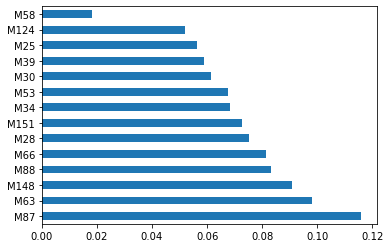

In [2135]:
#Using Random forest algorithm (default parameters)

rf.fit(X_train6,y_train6)

feat_importances = pd.Series(rf.feature_importances_, index=X_train6.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

#Random forest identifies the importance of a variable based on the mean decrease in impurity across all the decision tree estimators which are ensembled.


In [2136]:
df_iv

,Variable,Info.Value
11,M87,0.569835
8,M63,0.501447
12,M88,0.430760
13,M124,0.377283
15,M148,0.362911
2,M28,0.332620
9,M66,0.321658
14,M127,0.218622
0,M15,0.198591
5,M39,0.192382


In [2137]:
# We can see the variable importance order made by random forest and Information Value method are not the same.
# Lets choose the first three important variable ,then make power transformation and train the model.

In [2138]:
# Actual values of varibles before transformation
X_train6.head()

,M25,M28,M30,M34,M39,M53,M58,M63,M66,M87,M88,M124,M148,M151
0,4.700000e+07,2.358491,1.278607e+08,0.040450,4.000000e+06,7.500000,0.0,-7.800000e+07,-4.826130e+07,596624.0,34.0,6.0,1.137554,0.914831
1,1.234333e+07,3.391304,2.199603e+07,1.803985,2.332033e+08,1.666667,1.0,-5.608099e+07,5.317400e+04,22000.0,80.0,1.0,0.940661,1.016467
2,3.616667e+06,0.582734,4.246794e+06,1.181445,-8.140667e+06,0.066667,0.0,-1.821839e+07,-1.120641e+07,3300.0,22.0,0.0,1.007713,0.988912
3,7.540000e+07,0.570909,6.375040e+07,1.015880,2.400000e+08,0.200000,0.0,-7.543467e+07,2.509527e+07,-3463893.0,22.0,12.0,1.504471,0.483688
4,3.000000e+07,6.909091,6.912100e+04,5.559125,-2.500000e+07,1.000000,0.0,-4.000000e+06,6.818941e+07,14300.0,65.0,20.0,2815.070183,0.600029


In [2139]:
# Transforming the varibles to higher power to see if it increases the power of prediction

# top three highly significant variable from the random forest and IV variable list
X_train6["M63"] = X_train6["M63"]**2
X_train6["M88"] = X_train6["M88"]**2
X_train6["M124"] = X_train6["M124"]**2


In [2140]:
# checking if the transformation has happened
X_train6.head()

,M25,M28,M30,M34,M39,M53,M58,M63,M66,M87,M88,M124,M148,M151
0,2.209000e+15,2.358491,1.278607e+08,0.001636,4.000000e+06,56.250000,0.0,-7.800000e+07,-4.826130e+07,596624.0,34.0,36.0,1.137554,0.914831
1,1.523579e+14,3.391304,2.199603e+07,3.254360,2.332033e+08,2.777778,1.0,-5.608099e+07,5.317400e+04,22000.0,80.0,1.0,0.940661,1.016467
2,1.308028e+13,0.582734,4.246794e+06,1.395812,-8.140667e+06,0.004444,0.0,-1.821839e+07,-1.120641e+07,3300.0,22.0,0.0,1.007713,0.988912
3,5.685160e+15,0.570909,6.375040e+07,1.032011,2.400000e+08,0.040000,0.0,-7.543467e+07,2.509527e+07,-3463893.0,22.0,144.0,1.504471,0.483688
4,9.000000e+14,6.909091,6.912100e+04,30.903867,-2.500000e+07,1.000000,0.0,-4.000000e+06,6.818941e+07,14300.0,65.0,400.0,2815.070183,0.600029


In [2141]:
# lets take validation data from our previous import and chose only retained variables
y_valid6 = df1_valid_descaled["target"]
X_valid6 = df1_valid_descaled[X_train4_col]

In [2142]:
# Transforming the specified varibles in validation dataset too

# top three highly significant variable from the random forest and IV variable list
X_valid6["M63"] = X_valid6["M63"]**2
X_valid6["M88"] = X_valid6["M88"]**2
X_valid6["M124"] = X_valid6["M124"]**2


In [2143]:
# Standardizing the train data with only 14potential variables 

# initializing the scaler object
scaler_new3 = StandardScaler()

# fit and transform the train data
data_woe_scaled_vif_transf = scaler_new3.fit_transform(X_train6)

In [2144]:
# Standardizing the validation data using the fit of train data(mean and standard deviation)
X_valid6_scaled = scaler_new3.transform(X_valid6)

In [2145]:
# Lets increase the sample size of the minority class before training the model

#Initialize smote object - Sythetic Minority Oversampling Technique
oversample = SMOTE(random_state=50)

#oversampling the classes (Note:using the same scaled data from previous trial)
X_train_transf, y_train_transf = oversample.fit_resample(data_woe_scaled_vif_transf, y_train6)

# Summarizing the distribution
counter = Counter(y_train_transf)
for k,v in counter.items():
    per = v / len(y_train_transf) * 100
    print("Class:",k,"Count:",v,"Percentage:", per)

Class: 0 Count: 245 Percentage: 50.0
Class: 1 Count: 245 Percentage: 50.0


In [2146]:
# Classification report of multiple models over scaled - oversampled 
for i in L1:
    multiple_model(i,X_train_transf, y_train_transf,X_valid6_scaled,y_valid6)

____________________________________________________________________________________________________
LogisticRegression(random_state=50)
              precision    recall  f1-score   support

           0       0.45      0.76      0.57        25
           1       0.87      0.63      0.73        63

    accuracy                           0.67        88
   macro avg       0.66      0.70      0.65        88
weighted avg       0.75      0.67      0.69        88

                Predicted +ve [1]  Predicted -ve [0]
Actual +ve [1]         40                 23        
Actual -ve [0]          6                 19        
____________________________________________________________________________________________________
LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

           0       0.47      0.76      0.58        25
           1       0.88      0.67      0.76        63

    accuracy                           0.69        88
   macro avg       0.68      

In [2147]:
# Based on the individual performance we will choose the best classifiers as our voting classifiers

m1,m2,m3 = xgb,ab,gb # xgboost,gradient,adaboost

voting_classifier(m1,m2,m3,X_train_transf, y_train_transf,X_valid6_scaled,y_valid6)

Voting Classifier
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        25
           1       0.86      0.86      0.86        63

    accuracy                           0.80        88
   macro avg       0.75      0.75      0.75        88
weighted avg       0.80      0.80      0.80        88

                Predicted +ve [1]  Predicted -ve [0]
Actual +ve [1]         54                  9        
Actual -ve [0]          9                 16        


In [2148]:
# Using the function to create dataframe
result_frame(L2,X_train_transf,y_train_transf,X_valid6_scaled,y_valid6,m1,m2,m3)

,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.677551,0.659483,0.677551,0.624490
LinearDiscriminantClassifier,0.683673,0.668094,0.683673,0.636735
AdaptiveBoosting,0.922449,0.920833,0.922449,0.902041
Gradient_Boosting,0.977551,0.977688,0.977551,0.983673
RandomForest,1.000000,1.000000,1.000000,1.000000
Bagging classifier,0.993878,0.993840,0.993878,0.987755
Xg boost,1.000000,1.000000,1.000000,1.000000
VotingClassifier,1.000000,1.000000,1.000000,1.000000
,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.670455,0.733945,0.697460,0.634921


<b> Remarks:

* Variable transformation over the chosen variable with higher power(2,3,5) didnt show any significant rise in the performance of the model
* We have dropped suspecious variables(iv>0.5) too but the performance didnt improve much.   
* Lets try using different method to check the variable importance and see the performance of the model in prediction in our next trial using lasso regularization.

### <font color= BLUE> Experiment 8
    
* <b> Use Lasso Regularization to identify feature importance / feature reduction in predicting the target   

In [2149]:
# We will use Logistic Regression to idetify the varible importance using Lasso regularization
from sklearn.linear_model import LogisticRegressionCV

In [2150]:
data_lasso = pd.read_csv("Null Variables dropped denormalized and Knn_imputed.csv")

In [2151]:
# separating X and Y
X_train7 = data_lasso.iloc[:,:-1]
y_train7 = data_lasso["target"]

In [2152]:
# Standardize # initializing the scaler object
scaler_lasso = StandardScaler()

# fit and transform the train data
data_lasso_scaled = scaler_lasso.fit_transform(X_train7)

In [2153]:
# Using logistic regression model to fit lasso penalty
lasso = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5)
lasso.fit(data_lasso_scaled, y_train7)

LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear')

In [2154]:
#Coefficients of each variable
len(lasso.coef_[0])

147

In [2155]:
#Creating dataframe for all coefficients wrt to variables 
lasso_coeff_frame = pd.DataFrame({"Variables":X_train7.columns,"Lasso_coeff":lasso.coef_[0]})
print(lasso_coeff_frame)

    Variables  Lasso_coeff
0        M1     0.000000  
1        M2     0.203512  
2        M3     0.000000  
3        M4     0.000000  
4        M6     0.000000  
5        M7    -0.088175  
6        M8     0.000000  
7        M9     0.000000  
8       M10     0.003454  
9       M11     0.000000  
10      M12     0.000000  
11      M13     0.000000  
12      M14     0.000000  
13      M15     0.000000  
14      M16     0.000000  
15      M17    -0.046771  
16      M18     0.000000  
17      M19     0.000000  
18      M20     0.000000  
19      M21     0.000000  
20      M22     0.000000  
21      M23     0.000000  
22      M24     0.000000  
23      M25     0.000000  
24      M26     0.000000  
25      M27     0.000000  
26      M28     0.196948  
27      M29    -0.319959  
28      M30     0.065543  
29      M31    -0.026610  
30      M32     0.000000  
31      M33     0.000000  
32      M34     0.000000  
33      M35     0.021993  
34      M37     0.000000  
35      M38    -0.020501  
3

In [2156]:
# variables without null coefficients
lasso_coeff_frame = lasso_coeff_frame.drop(lasso_coeff_frame[lasso_coeff_frame['Lasso_coeff'] ==0].index)
len(lasso_coeff_frame)

39

* From lasso regularization ,it has nullified 108 variables coefficient (147-39=108) stating it as insignificant.

In [2157]:
# lets take validation data from our previous import and chose only the selected variables with lasso
y_valid7 = df1_valid_descaled["target"]
X_valid7 = df1_valid_descaled.iloc[:,:-1]

In [2158]:
# Standardizing the validation data using the fit of train data(mean and standard deviation)
X_valid7_scaled = scaler_lasso.transform(X_valid7)

In [2159]:
for i in [lasso]:
    multiple_model(i,data_lasso_scaled, y_train7,X_valid7_scaled,y_valid7)

____________________________________________________________________________________________________
LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear')
              precision    recall  f1-score   support

           0       0.75      0.24      0.36        25
           1       0.76      0.97      0.85        63

    accuracy                           0.76        88
   macro avg       0.76      0.60      0.61        88
weighted avg       0.76      0.76      0.71        88

                Predicted +ve [1]  Predicted -ve [0]
Actual +ve [1]         61                  2        
Actual -ve [0]         19                  6        


<b> Remarks:
* Lasso helps to nullify the co-efficients of the variables which have no significant effect over the target.In our case it has nullified 108 variables.However the important variables stated by others methods like IV and Ensembling are different.
* We can try to identify the Multicollinear variables followed by one after the other and check the change in performance of the models.
* The results from Logistic reg using Lasso Regularization are not satisfactory because it could not classify the minority classes well.Apply oversampling techniques is dfficult in this case because oversampling changes the property of the data which could be misleading for lasso method.

### 6.TEST PREDICTION

<b> Model and Method for final prediction,
* The method which gave the best result in prediction for the given dataset  
              {"EXPERIMENT 4" : [Feature selection using Information Value --> Standardized --> Oversampled]} 
* We will use Voting classifiers which was performing better than other individual models in most of the trials.

In [2022]:
# importing test data
test_data = pd.read_csv("OOT_data_Jenfi_assessment_070423.csv")

# dropping all variables which we dropped in train data
test_data.drop(['M5', 'M36', 'M49', 'M72',"Unnamed: 0"],axis=1,inplace=True)

In [2023]:
# check for null values
test_data.isna().sum()

M1       0
M2       1
M3      35
M4       0
M6       0
M7      49
M8       3
M9       1
M10      3
M11      0
M12      9
M13      0
M14      2
M15      0
M16      1
M17      0
M18      0
M19      0
M20      1
M21      1
M22      1
M23      0
M24      0
M25     51
M26      0
M27      0
M28      0
M29      1
M30     50
M31      1
M32      6
M33     44
M34     18
M35      3
M37      1
M38      1
M39     48
M40     52
M41     16
M42      7
M43      1
M44      1
M45      0
M46     55
M47      0
M48      1
M50      3
M51      1
M52     37
M53     10
M54      0
M55      4
M56      2
M57      0
M58      0
M59      0
M60      0
M61      0
M62      7
M63     12
M64     55
M65      0
M66      0
M67      1
M68      0
M69      0
M70      0
M71     35
M73      1
M74      7
M75      0
M76      0
M77      0
M78      2
M79      0
M80      1
M81     11
M82      1
M83      1
M84      1
M85      0
M86     12
M87      1
M88      0
M89      0
M90      6
M91      1
M92      1
M93      0
M94      2
M95     24

In [2024]:
# check variable type
test_data.dtypes

M1      float64
M2      float64
M3      float64
M4      float64
M6      float64
M7      float64
M8      float64
M9      float64
M10     float64
M11     float64
M12     float64
M13     float64
M14     float64
M15       int64
M16     float64
M17     float64
M18     float64
M19     float64
M20     float64
M21     float64
M22     float64
M23     float64
M24     float64
M25     float64
M26       int64
M27       int64
M28     float64
M29     float64
M30     float64
M31     float64
M32     float64
M33     float64
M34     float64
M35     float64
M37     float64
M38     float64
M39     float64
M40     float64
M41     float64
M42     float64
M43     float64
M44     float64
M45     float64
M46     float64
M47       int64
M48     float64
M50     float64
M51     float64
M52     float64
M53     float64
M54     float64
M55     float64
M56     float64
M57     float64
M58       int64
M59     float64
M60     float64
M61     float64
M62     float64
M63     float64
M64     float64
M65     float64
M66     

In [2025]:
#replace inf with nan to overcome errors
test_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [2026]:
# normalize the dataset, only transforming because we will use the same fit of train data
test_data_norm = mm_scaler.transform(test_data)

# imputing the test dataset using knn method "3" neighbours
test_data_imputed = imputer.transform(test_data_norm)

In [2027]:
# Denormalizing the imputed values into original scale and converting to dataframe 
test_descaled = pd.DataFrame(mm_scaler.inverse_transform(test_data_imputed))
test_descaled.set_axis(df1_valid_col[:-1], axis=1,inplace=True)

In [2028]:
test_descaled.head()

,M1,M2,M3,M4,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19,M20,M21,M22,M23,M24,M25,M26,M27,M28,M29,M30,M31,M32,M33,M34,M35,M37,M38,M39,M40,M41,M42,M43,M44,M45,M46,M47,M48,M50,M51,M52,M53,M54,M55,M56,M57,M58,M59,M60,M61,M62,M63,M64,M65,M66,M67,M68,M69,M70,M71,M73,M74,M75,M76,M77,M78,M79,M80,M81,M82,M83,M84,M85,M86,M87,M88,M89,M90,M91,M92,M93,M94,M95,M96,M97,M98,M99,M100,M101,M102,M103,M104,M105,M106,M107,M108,M109,M110,M111,M112,M113,M114,M115,M116,M117,M118,M119,M120,M121,M122,M123,M124,M125,M126,M127,M128,M129,M130,M131,M132,M133,M134,M135,M136,M137,M138,M139,M140,M141,M142,M143,M144,M145,M146,M147,M148,M149,M150,M151
0,2.794286e+05,0.0,0.000000e+00,0.142857,0.142857,4.666667,2.113188e+06,0.0,4.557256e+07,0.0,1.257300e+08,1.571429,2.0,14.0,0.000000,3.0,0.142857,0.428571,0.000000e+00,0.0,0.000000,0.000000e+00,0.0,1.797325e+08,0.0,0.0,2.428571,0.0,2.468956e+06,1000000.0,2.205000e+14,0.500000,1.123875,0.0,0.000000,0.0,-500000000.0,1.033925e+08,2.0,7.0,7.0,6.0,2.073184e+06,1.285714e+05,1.0,8755428.0,956000.0,7.177382e+06,0.0,1.444444,0.0,8.000000,1.204300e+07,2.142857e+06,4.0,0.0,0.142857,-2.291686e+04,1.336887e+17,-3.552769e+07,9.523810e+06,8.0,4.465011e+05,1501091.0,6434310.0,6.0,0.0,4.0,0.0,0.666667,0.142857,0.428571,0.0,1.000000e+06,1.0,5.893583e+05,2.0,0.000000,1471091.0,0.142857,1.489016e+05,6.354857e+08,178.0,125.0,0.000000,956682.0,0.0,2.0,0.000000,1000000.0,0.759622,1.000000,1.000000e+06,5019704.0,2.144416e+05,0.142857,3.028764e+05,7.900245e+15,1.000000,0.000000,0.666667,0.0,1.333333,1.0,0.0,3.554369e+06,6.829441e+06,1.680639e+06,2.0,0.285714,4.286591e+05,6.663588e+06,3.550145e+06,0.142857,2.854730e+05,1.888868e+07,0.900000,2.291686e+04,0.0,8.0,0.285714,1.018747e+06,2.526316,0.0,0.0,0.0,0.285714,1471091.0,0.333333,0.000000,1.471091e+06,0.0,35243117.5,0.000000,0.285714,0.285714,0.0,1.600193e+05,0.000000,0.428571,0.000000e+00,1.000000,2.0,1.245265,0.237600,0.000000,0.999761
1,2.543407e+07,0.0,0.000000e+00,3.285714,2.571429,1.172131,5.587033e+06,8.0,5.609760e+07,14191650.0,1.165804e+07,6.857143,3.0,0.0,0.285714,325.0,4.428571,1.571429,1.404086e+06,0.0,0.714286,5.044710e+06,62143844.0,5.500000e+04,30.0,0.0,0.092462,2639437.0,1.659751e+07,1007127.0,6.289461e+14,25.000000,9.972064,0.0,8.571429,29.0,4900000.0,2.996722e+07,7.0,5.0,14.0,11.0,3.498189e+07,1.885714e+06,80.0,24259987.0,1006378.0,2.245893e+06,1.0,0.037037,3905022.0,5.766667,4.580667e+07,5.520570e+07,0.0,0.0,2.285714,3.586779e+05,7.221932e+13,-4.775762e+06,1.100000e+06,15.0,-1.681813e+06,2892661.0,13483963.0,0.0,77.0,33.0,5.0,9.857143,31.000000,33.142857,13511819.0,9.592868e+06,32.0,4.431868e+06,82.0,15.285714,4515097.0,9.000000,4.087866e+06,1.864471e+13,-1124458.5,7.0,33.571429,11067848.0,0.0,13.0,29.142857,1007127.0,26.811720,13.200000,6.809834e+06,1340300.0,6.411309e+06,6.714286,4.283151e+06,1.097304e+13,11.800000,40.428571,83.200000,5.0,78.142857,13.5,10.5,1.916434e+07,1.278329e+07,7.545009e+06,2.0,71.571429,4.681515e+06,3.647328e+06,1.056140e+07,46.285714,4.893895e+06,5.758583e+06,39.720000,8.601064e+06,1024754.0,2.0,9.428571,4.983020e+06,0.069767,162.0,13.0,13.0,99.000000,6516128.0,51.857708,11.571429,3.786031e+06,16834478.0,3866209.0,64.142857,83.285714,30.428571,3236363.0,4.135060e+06,11.285714,57.142857,4.361425e+06,37.000000,14.0,1.011859,0.896424,0.956242,2.577387
2,1.012459e+08,1134035.0,0.000000e+00,3.571429,1.285714,0.333333,9.885223e+06,0.0,2.795683e+06,127916014.0,1.331600e+07,1.571429,4.0,0.0,0.000000,17.0,7.285714,4.428571,0.000000e+00,0.0,0.000000,9.178193e+07,0.0,1.046667e+07,3.0,1.0,3.157895,0.0,1.376695e+07,310766.0,9.046273e+13,1.000000,5.253068,0.0,0.428571,0.0,-15070000.0,4.543338e+06,2.0,1.0,2.0,2.0,3.310748e+07,0.000000e+00,0.0,34916014.0,927400.0,0.000000e+00,0.0,2.000000,332610063.0,1.200000,6.323682e+08,5.714770e+06,1.0,17716621.0,1.285714,-3.882796e+06,2.179054e+14,1.070333e+06,0.000000e+00,7.0,1.627143e+06,0.0,137016014.0,2.0,1.0,3.0,0.0,1.000000,0.714286,1.428571,19019676.0,3.503660e+05,1.0,0.000000e+00,1.0,0.000000,11529063.0,0.

In [2029]:
# selecting the variables in test data as per Info.value
test_descaled = test_descaled[variables]

In [2030]:
# Standardizing the test data using the fit of train data(mean and standard deviation)
X_test_scaled = scaler_new.transform(test_descaled)

In [2031]:
# Predicting the test sample

# We are using xgboost,adaboost,gradientboost as our classifiers since there performed consistently in majority of the trials at different seeds.
model1 = xgb  
model2 = ab  
model3 = gb

# Define the voting classifier
voting_clf = VotingClassifier(estimators=[('m1', model1), ('m2', model2), ('m3', model3)], voting='soft')

# Train the voting classifier on the training data (from experiment-4)
voting_clf.fit(X_train_psmt, y_train_psmt)  

# Evaluate the performance of the voting classifier on the test data
pred = voting_clf.predict_proba(X_test_scaled)


In [2032]:
# Savings the results to excel file
df_final = pd.DataFrame({"predicted_target_probability":pred[:,1]})
df_final.index.name = 'S.No'
df_final.to_excel("Bharath_Bommeeshwar_07042023.xlsx")

In [2162]:
df_final

,predicted_target_probability
S.No,
0,0.730971
1,0.609938
2,0.876146
3,0.790776
4,0.162852
5,0.717402
6,0.780642
7,0.248025
8,0.822823


----------------------------------------------------------------------------------------------------------------------------